## Examen 1
# Felipe Lucciano Santino Di Vanni Valenzuela
# Link del dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Limpieza de datos con Python:
- Identificar y solucionar cualquier valor duplicado.
- Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
- Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
- Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
- Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).
 

In [1]:
#Primero cargaremos las librerias y generaremos el dataframe
import pandas as pd
import numpy as np
path = 'C:/Users/Felipe/Documents/Curso/BootCamp/bootCamp/Repositorios/examen_1/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df =  pd.read_csv(path)
#Mostramos las primeras 10 filas del dataframe para ver que se cargaron correctamente los datos
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Normalmente el primer paso que realizaria luego de ver las columnas seria normalizar estas mismas a minusculas y reemplazar espacios por "_" pero en este caso que las columnas esta con camelCase por temas de legibilidad no lo hare

In [2]:
'''
A continuacion se revisara columna por columna para ver que los tipos de datos coincidan con los valores que nos dice el detalle del dataset
para esto podemos usar df.info() para ver directamente los tipos de datos y tambien si llegasen a existir nulos.

De igual manera observando en la pagina del dataframe podemos dar una lectura rapida a las columnas y ver que tipo de datos y los datos que tendran cada columna.
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Podemos observar directamente que no existen valores nulos dentro del data set , pero si podemos indicar que:
- SeniorCitizen y Tenure deben ser (int)
- MonthlyCharges y TotalCharges deben ser (float)

Por ahora lo unico que tendriamos que arreglar con respecto al diccionario de datos es el tipo de TotalCharges ya que se encuentra en object y no en float.

Pero antes de eso, vamos a ver si existen valores duplicados dentro del dataset.

In [3]:
# Para esto utilizamos el metodo duplicated que identifica las filas que tengan todos sus valores iguales.
# Luego sumamos los valores verdaderos que representan las filas duplicadas.
duplicados = df.duplicated().sum()
print(f"Duplicados actuales en el dataframe: {duplicados}")

Duplicados actuales en el dataframe: 0


Observamos que no existen valores duplicados en el dataset.

In [4]:
'''

Ahora procedemos a arreglar el tipo de dato de la columna TotalCharges de object a float
    df['TotalCharges'] = df['TotalCharges'].astype(float)

Para verificar el cambio y si no existieron problemas en los datos.
    df.info()
    
'''

"\n\nAhora procedemos a arreglar el tipo de dato de la columna TotalCharges de object a float\n    df['TotalCharges'] = df['TotalCharges'].astype(float)\n\nPara verificar el cambio y si no existieron problemas en los datos.\n    df.info()\n\n"

Podemos observar que al utilizar la funcion astype() nos arroja un error debido a que no podemos convertir un string a un float.(Deje el paso anterior comentado para que se pueda observar el error)

Para esto encontre el metodo de pandas to_numeric() que nos permite convertir un string a un float y ademas nos permite manejar los errores que puedan surgir.

Por ejemplo en la funcion a continuacion utilizaremos el parametro errors='coerce' que nos permite convertir los valores que no pueden ser float a Nan o tambien dichos como nulos.

Para un mejor entendimiento del parametro errors , investigue que almenos hay 3 opciones para este parametro:
- raise: que es el valor por defecto y nos arroja un error si no puede convertir el valor.
- coerce: nos convierte el valor a NaN si no puede convertirlo.
- ignore: nos ignora el valor y nos devuelve el valor original.

Para este caso encontre mas util la transformacion a nulo ya que luego podriamos identifcar estas filas mucho mas facilmente y generar un supuesto para reemplazar estos datos.

In [5]:
# Utilizamos el metodo mencionado anteriormente.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Mostramos los resultados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Pudimos transformar la columna a tipo float pero en el proceso de esto se perdieron datos generandose nulos, primero veremos que porcentaje de datos nulos tenemos en la columna para poder gestionar los mismos.

In [6]:
# Procedemos a ver la cantidad de nulos que existen en la columna TotalCharges actualmente.
nulos = df['TotalCharges'].isna().sum()
print(f"La cantidad de nulos en la columna TotalCharges es: {nulos}")

La cantidad de nulos en la columna TotalCharges es: 11


Ahora procederemos a calcular la cantidad de filas que hay en el dataframe y sacaremos el porcentaje de nulos asociado.

In [7]:
# Sacamos la cantidad de filas que existen mediante el metodo shape
filasTotales = df.shape[0]
# Utilizamos el \n para que se imprima en una nueva linea
print("\nLa cantidad de filas totales es: ", filasTotales)

# Para sacar el porcentaje dividimos la cantidad de nulos en el total de filas y multiplicamos por 100
porcentajeNulos = (nulos / filasTotales) * 100
# Utilizo la funcion round para redondear el resultado a un numero mas legible
print("\nEl porcentaje de nulos por columna es: ", round(porcentajeNulos,4))


La cantidad de filas totales es:  7043

El porcentaje de nulos por columna es:  0.1562


Al ser un porcentaje tan bajo 0,1562% podriamos simplemente eliminar del dataset ya que no afectaria de manera significativa el resultado final.

Pero para generar un modelo mas robusto genere un supuesto entorno a:
- TotalCharges hace relacion al total facturado por un cliente por lo cual deberia estar relacionado con el tiempoq que lleva este y el cargo mensual que son datos que manejamos.
- Tenure es la cantidad de meses que lleva el cliente en la compañia 
- MonthlyCharges es el cargo mensual que paga el cliente.
- Asi que podriamos calcular esos valores nulos como Tenure * MonthlyCharges
- Tambien se debe tener en consideracion que puede que tenure sea 0 o 1 porque el cliente no lleva mucho tiempo en la compañia o existio un error en la carga de datos.

In [8]:
# Primero visualizemos las filas que tienen valores nulos con la columnas relevantes
# Sean el customerID , tenure , MonthlyCharges y TotalCharges
df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]


,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,NaN
753,3115-CZMZD,0,20.25,NaN
936,5709-LVOEQ,0,80.85,NaN
1082,4367-NUYAO,0,25.75,NaN
1340,1371-DWPAZ,0,56.05,NaN
3331,7644-OMVMY,0,19.85,NaN
3826,3213-VVOLG,0,25.35,NaN
4380,2520-SGTTA,0,20.00,NaN
5218,2923-ARZLG,0,19.70,NaN
6670,4075-WKNIU,0,73.35,NaN


Podemos observar que todas tienen tenure 0 por lo cual el TotalCharge como tal igual sera 0.

In [9]:
# Para esto utilizaremos una variable para guardar losnulos
# Luego realizaremos el reemplazo especifico de estos valores utilizando .loc

valNulos = df['TotalCharges'].isnull()
df.loc[valNulos, 'TotalCharges'] = df.loc[valNulos,'tenure'] * df.loc[valNulos,'MonthlyCharges']

# Volvemos a ver los valores nulos para asegurarnos que ya no hayan
df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,customerID,tenure,MonthlyCharges,TotalCharges


Podemos ver que se pudieron manejar de manera correcta los nulos.

Ahora procederemos a manejar los valores categoricos existentes en el data set.


In [10]:
'''
A continuacion hare uso de la funcion select_dtypes que me permite seleccionar las columnas de
algun tipo en especifico, por ejemplo a continuacion selecciono las columnas de tipo object 
ya que queremos normalizar dichos valores para que no haya problemas con los espacios o mayusculas

Luego utilizamos un for para iterar sobre cada columna del tipo object 
y utilizamos:
- str.strip() para eliminar los espacios en blanco al inicio y al final de cada string
- str.lower() para convertir todos los caracteres a minúsculas
- astype para convertir a string

'''
# Guardamos las columnas en una variable
catColumns = df.select_dtypes(include=['object']).columns
# Iteramos sobre cada columna para proceder a normalizar dentro del dataframe.
for column in catColumns:
    df[column] = df[column].astype(str).str.strip().str.lower()
    


Procedemos a generar una ultima revision entorno a si existe algun otro valor faltante o nulo dentro del dataframe y luego revisaremos si no existen valores inusuales igualemtente dentro del dataframe.

Con inusuales me refiero a:
- Tenure no puede ser negativo
- MonthlyCharges no puede ser negativo
- TotalCharges no puede ser negativo
- SeniorCitizen no puede ser negativo
- SeniorCitizen no puede ser mayor a 1

In [11]:
# Revisamos si existen nulois dentro de todo el dataframe con la funcion values.any
# Esta funcion nos entrega como resultado True si existen nulos y False si no existen nulos
df.isnull().values.any()


np.False_

In [12]:
# Ahora revisaremos si existen valores inusuales en el dataframe
# 1. tenure negativo
if (df['tenure'] < 0).any():
    print("Existen valores negativos en tenure")
else:
    print("No existen valores negativos en tenure")

# 2. MonthlyCharges negativo
if (df['MonthlyCharges'] < 0).any():
    print("Existen valores negativos en MonthlyCharges")
else:
    print("No existen valores negativos en MonthlyCharges")

# 3. TotalCharges negativo
if (df['TotalCharges'] < 0).any():
    print("Existen valores negativos en TotalCharges")
else:
    print("No existen valores negativos en TotalCharges")

# 4. SeniorCitizen fuera de 0 o 1
if ((df['SeniorCitizen'] < 0) | (df['SeniorCitizen'] > 1)).any():
    print("Existen valores fuera de 0 o 1 en SeniorCitizen")
else:
    print("No existen valores fuera de 0 o 1 en SeniorCitizen")

No existen valores negativos en tenure
No existen valores negativos en MonthlyCharges
No existen valores negativos en TotalCharges
No existen valores fuera de 0 o 1 en SeniorCitizen


A continuacion procederemos con la exploracion de los datos donde se nos solicita lo siguinte: 

# Exploración de datos con Python:
- Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
- Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


In [13]:
# Para generar estas visualizaciones utilizaremos seaborn y matplotlib.pyplot 
import seaborn as sns
import matplotlib.pyplot as plt

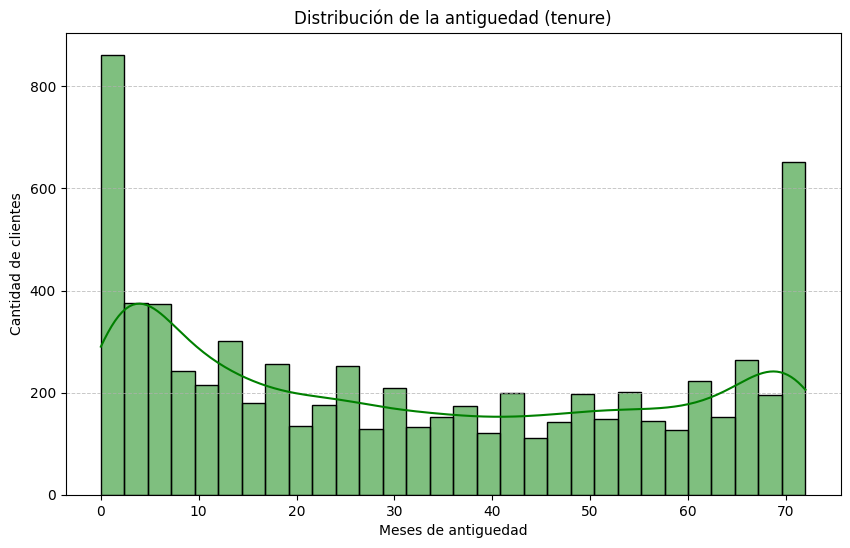

In [43]:
'''
La primera visualizacion que mostrate toma relacion entorno a la distribucion de tenure
que nos permitiria ver la distribucion valga la redundacia de la antiguedad de los clientes.
Para esto utilizaremos un histograma que nos permitira ver la cantidad de clientes entorno a los meses de antiguedad

'''
# Primero definimos el tamaño de la figura
plt.figure(figsize=(10, 6))
# Creamos el histograma para la columna 'tenure' , bins nos permite definir la cantidad de intervalos que queremos que tenga el histograma
# y el parametro kde nos permite agregar una linea de densidad kernel segun busque que es una estimacion de la distribucion de los datos.
sns.histplot(df['tenure'], bins=30, kde=True , color='green')
# Le agregamos una grilla para que sea mas facil de leer el grafico
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title('Distribución de la antiguedad (tenure)')
plt.xlabel('Meses de antiguedad')
plt.ylabel('Cantidad de clientes')
plt.show()


Interpretacion: La mayoria de los clientes tienen menos de 20 meses de antiguedad, lo que puede indicar una alta rotacion de estos mismos

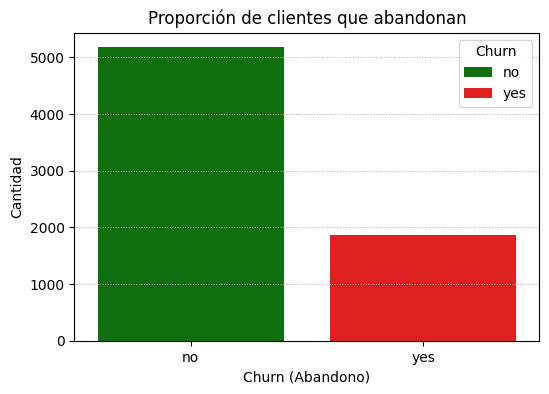

In [50]:
'''
La proxima visualizaciono a mostrar es la proporcion de clientes que abandonan (churn segun el dataset nos permite identificar si el cliente
abandono el servicio en el ultimo mes.

Esto lo realizaremos con un grafico de barras para poder visualizar la cantidad de clientes que abandonan y los que no.


'''
plt.figure(figsize=(6,4))
'''
Intente realizarlo con el barplot pero no me permitia visualizar la data de manera corecta solo mostraba 1 barra sin sentido alguno
Por lo cual encontre countplot que me permite visualizar la data en forma de barras pero separando las variables de yes y no de la columna Churn
Este tipo de grafico cuenta automaticamente la cantidad por cada categoria y puedo visualizarlo tanto de manera vertical (Default)
o Horizontal utilizando el paramentro orient="h"


Definimos que eje queremos las categorias y que contabilice la data del dataframe.
Utilizando el parametro palette podemos definir los colores de las barras para cada categoria
Al usar este parametro me solicito usar le parametro hue que me permite definir una dimension extra en algunos casos,
pero en este caso me permite definir que separe las categorias de la columna Churn
Con este parametro igual podemos definir las leyendas si queremos que se muestren
'''
sns.countplot(x=df['Churn'], data=df, hue =df['Churn'], palette = {'no': 'green', 'yes': 'red'}, legend=True)
# Le agregamos una grilla para que sea mas facil de leer el grafico
plt.grid(True, which='both', axis='y', linestyle=':', linewidth=0.7, alpha=1)
plt.title('Proporción de clientes que abandonan')
plt.xlabel('Churn (Abandono)')
plt.ylabel('Cantidad')
plt.show()

Interpretacion: Hay mas clientes que NO abandonan que los que si, pero la proporcion de abandono es significativa cercana a los 2000 clientes.

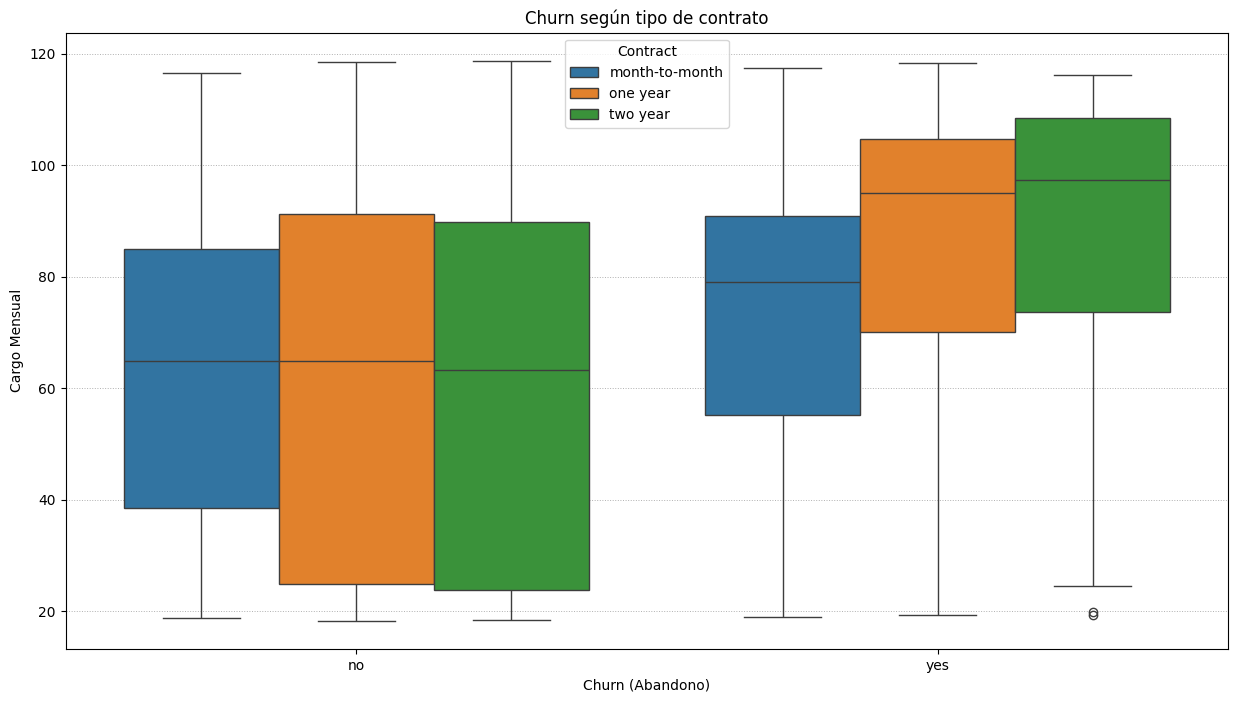

In [47]:
'''
A continuacion se presentara una vizualizacion multivariada en un grafico de caja donde se comprara la varibale numerica MonthlyCharges
segun la varibale categorica de contract y ademas dentro de esto se diferenciara por la variable de churn que nos permite ver si abandona o no.

Con esto podremos visualizar que para cada grupo de clientes que abandonen o no, se podra ver como varian los cargos mensuales y como
influye el tipo de contrato en esta variacion.

Para mejorar un poco el entendimiento de los paramentros en el boxplot se agregan:

X = Churn (Abandono)
Y = MonthlyCharges (Cargos mensuales)
Hue = nos permite vizualizar como cada color representa un tipo de contrato.

'''
plt.figure(figsize=(15,8))
# Al no definir los colores se asignan de manera automatica por las variables de contrato y ademas se asigna la legenda como true de manera default
sns.boxplot(x=df['Churn'], y=df['MonthlyCharges'], hue=df['Contract'], data=df)
# Le agregamos una grilla para que sea mas facil de leer el grafico
plt.grid(True, which='both', axis='y', linestyle=':', linewidth=0.7, alpha=1)
plt.title('Churn según tipo de contrato')
plt.xlabel('Churn (Abandono)')
plt.ylabel('Cargo Mensual')
plt.show()

Interpretacion: Se observa que los clientes que abandonan suelen tener cargos mensuales mas altos y mayor variabilidad. especialmente en contratos mensuales. Ademas esta la existencia de valores atipicos en el grupo de contratos de 2 años y con abandono donde estos tenian un cargo mensual muy bajos.

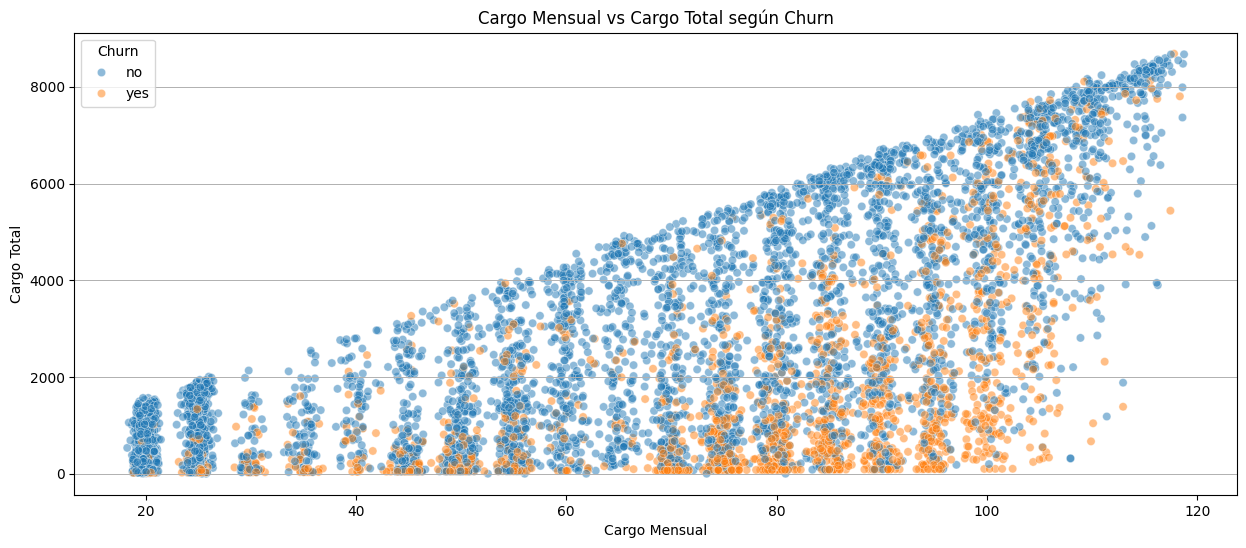

In [52]:
'''
A continuacion se generara un grafico multipvariable entorno a como afecta el cargo mensual y el cargo total al abandono de los clientes en la empresa.

Esto lo realizaremos por un grafico de dispersion donde nos permitera analizar la relacion entre el cargo mensual y el cargo total de los clientes,
diferenciando a quienes an abandonado el servicio y quienes no.

'''
plt.figure(figsize=(15,6))
#El alpha se utiliza para ajustar la transparencia de los puntos.
sns.scatterplot(x=df['MonthlyCharges'], y=df['TotalCharges'], hue=df['Churn'], data=df, alpha=0.5)
# Le agregamos una grilla para que sea mas facil de leer el grafico
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.7, alpha=1)
plt.title('Cargo Mensual vs Cargo Total según Churn')
plt.xlabel('Cargo Mensual')
plt.ylabel('Cargo Total')
plt.show()


Interpretacion: Se puede observar que los clientes con cargos mensuales mas altos tienden a concentrarse en la parte inferior del eje de cargo total por lo cual podemos inferir que se trata de clientes recientes o nuevos  y presentan una mayor proporcion de abandono.

Por otro lado los clientes con cargos totales mas altos suelen tener cargos mensuales mas bajos y en su mayoria no han abandonado el servicio, sugiriendo una mayor persistencia en el tiempo.